In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.fit_transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
128/128 [==============================] - 1s 4ms/step - loss: 12679.9570 - accuracy: 0.5050 - val_loss: 1250.7290 - val_accuracy: 0.6644
Epoch 2/200
128/128 [==============================] - 0s 2ms/step - loss: 545.1938 - accuracy: 0.7003 - val_loss: 211.2289 - val_accuracy: 0.5944
Epoch 3/200
128/128 [==============================] - 0s 2ms/step - loss: 105.6666 - accuracy: 0.6658 - val_loss: 51.6520 - val_accuracy: 0.7594
Epoch 4/200
128/128 [==============================] - 0s 2ms/step - loss: 38.2955 - accuracy: 0.6787 - val_loss: 24.5836 - val_accuracy: 0.6137
Epoch 5/200
128/128 [==============================] - 0s 3ms/step - loss: 43.1895 - accuracy: 0.6766 - val_loss: 41.4334 - val_accuracy: 0.7869
Epoch 6/200
128/128 [==============================] - 0s 3ms/step - loss: 30.8543 - accuracy: 0.6827 - val_loss: 51.0278 - val_accuracy: 0.7937
Epoch 7/200
128/128 [==============================] - 0s 3ms/step - loss: 38.5575 - accuracy: 0.6778 - val_loss: 26.2236 

In [ ]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[2.6353266e-27],
       [6.1572207e-14],
       [2.9292901e-12],
       ...,
       [3.7971149e-27],
       [6.8677100e-04],
       [2.0987015e-28]], dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

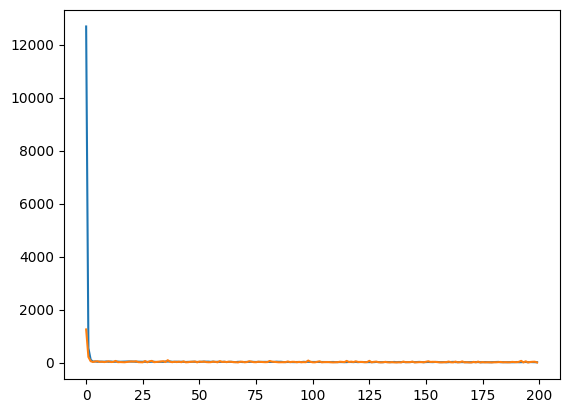

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

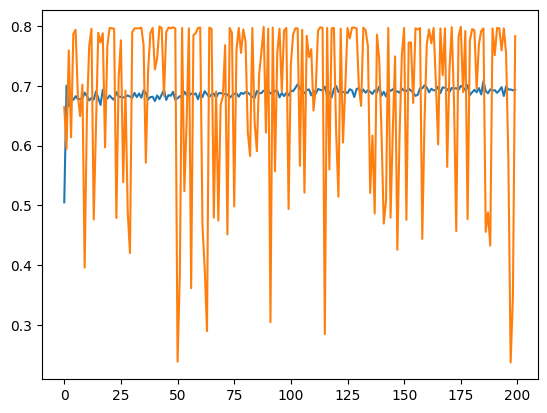

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])